# Lead Scoring Case Study

In [1]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')
import time, warnings
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

## Reading the data

In [3]:
data_leads = pd.read_csv("/Users/shoaibmohammed/Desktop/Leads.csv")

In [4]:
data_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
data_leads.shape

(9240, 37)

In [7]:
print(data_leads.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [8]:
data_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
data_leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [10]:
data_leads.duplicated(subset=['Prospect ID'],keep = False).sum()

0

In [11]:
data_leads.duplicated(subset = ['Lead Number'], keep = False).sum()

0

#### Prospect ID and Lead Number are unique identifiers for the contacted individuals and do not provide additional value for analysis. Therefore, these variables can be safely dropped from the dataset.

### Data Cleaning and prepration

In [12]:
#Removing Lead Number and Prospect ID since they have all unique values

data_leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [13]:
#Converting 'Select' values to NaN.

data_leads = data_leads.replace('Select', np.nan)

In [14]:
data_leads.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [15]:
data_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [16]:
# Drop all the columns in which greater than 3000 missing values are present

while True:
    initial_cols = data_leads.shape[1]
    for col in data_leads.columns:
        if data_leads[col].isnull().sum() > 3400:
            data_leads.drop(col, axis=1, inplace=True)
    if data_leads.shape[1] == initial_cols:
        break

In [17]:
data_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [18]:
#checking the percentage of missing values in each column

missing_percentages = data_leads.isnull().mean() * 100
missing_percentages.round(2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [19]:
for column in data_leads:
    print(data_leads[column].astype('category').value_counts())
    print('___________________________________________________')

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
___________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
___________________________________________________
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
___________________________________________________

In [20]:
#Converting 'Select' values to NaN.

data_leads_new = data_leads.replace('Select', np.nan)

In [21]:
data_leads_new.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [22]:
# Dropping unique valued columns
data_leads_new= data_leads_new.drop(['Country','Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [23]:
data_leads_new.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Tags                        

In [24]:
data_leads_new.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations','Tags'], axis = 1, inplace = True)

In [25]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

data_leads_new.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [26]:
data_leads_new.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [27]:
data_leads_new = data_leads_new[~pd.isnull(data_leads_new['What is your current occupation'])]

In [28]:
data_leads_new = data_leads_new[~pd.isnull(data_leads_new['Specialization'])]

In [29]:
data_leads_new.isnull().sum()

Lead Origin                                0
Lead Source                                8
Do Not Email                               0
Converted                                  0
TotalVisits                               61
Total Time Spent on Website                0
Page Views Per Visit                      61
Last Activity                             49
Specialization                             0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [30]:
data_leads_new = data_leads_new[~pd.isnull(data_leads_new['TotalVisits'])]

In [31]:
data_leads_new = data_leads_new[~pd.isnull(data_leads_new['Page Views Per Visit'])]

In [32]:
data_leads_new = data_leads_new[~pd.isnull(data_leads_new['Lead Source'])]

In [33]:
data_leads_new.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [34]:
print(len(data_leads_new.index))
print(len(data_leads_new.index)/9240)

4535
0.4908008658008658


### We have around 49% of the rows which seems good.

In [35]:
data_leads_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


### Outliners

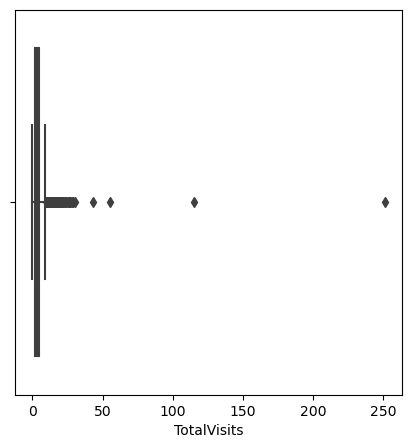

In [36]:
plt.figure(figsize = (5,5))
sns.boxplot(x=data_leads_new['TotalVisits'])
plt.show()

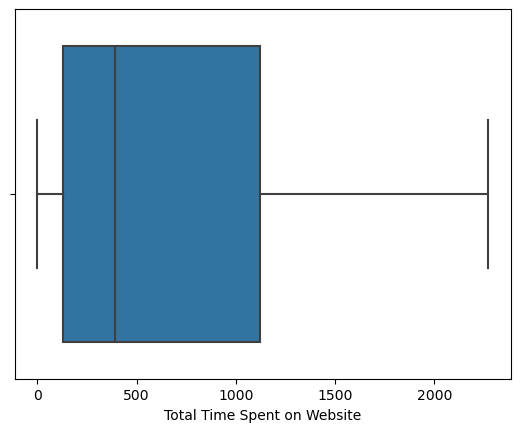

In [37]:
sns.boxplot(x=data_leads_new['Total Time Spent on Website'])
plt.show()

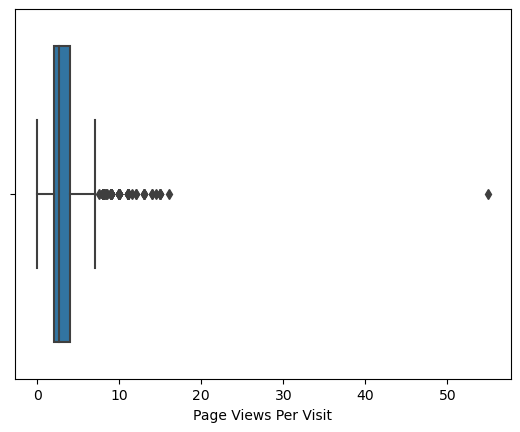

In [38]:
sns.boxplot(x=data_leads_new['Page Views Per Visit'])
plt.show()

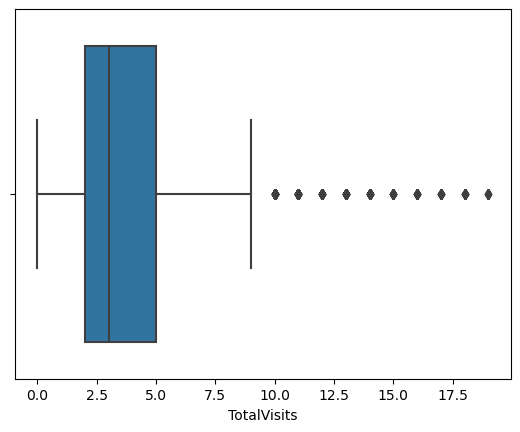

In [39]:
Q3 = data_leads_new.TotalVisits.quantile(0.99)
data_leads_new = data_leads_new[(data_leads_new.TotalVisits <= Q3)]
Q1 = data_leads_new.TotalVisits.quantile(0.01)
data_leads_new = data_leads_new[(data_leads_new.TotalVisits >= Q1)]
sns.boxplot(x=data_leads_new['TotalVisits'])
plt.show()

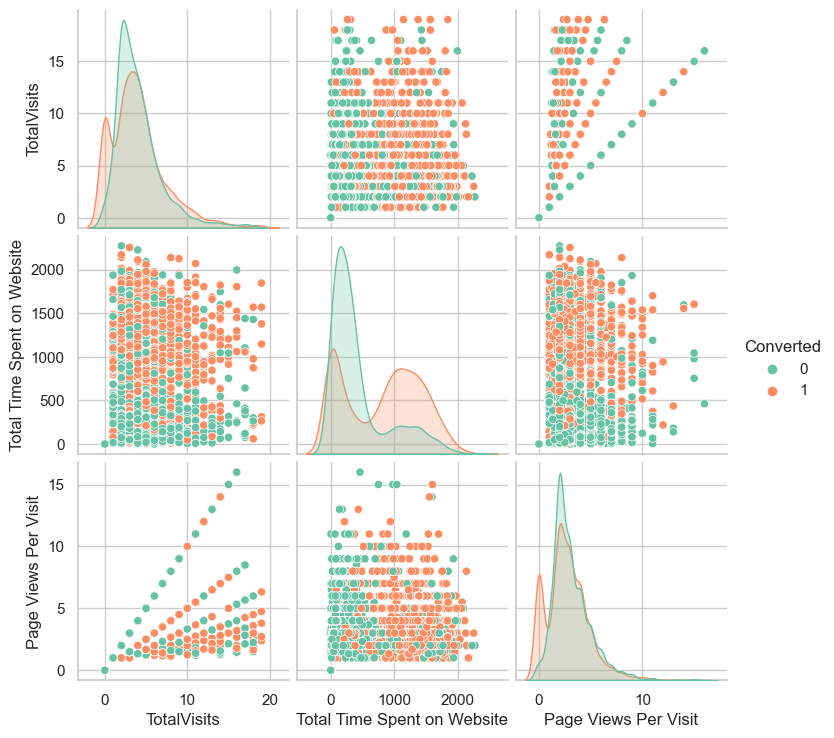

In [40]:

sns.set(style="whitegrid")
custom_palette = sns.color_palette("Set2", 2)
sns.pairplot(data_leads_new, diag_kind='kde', hue='Converted', palette=custom_palette)

plt.show()


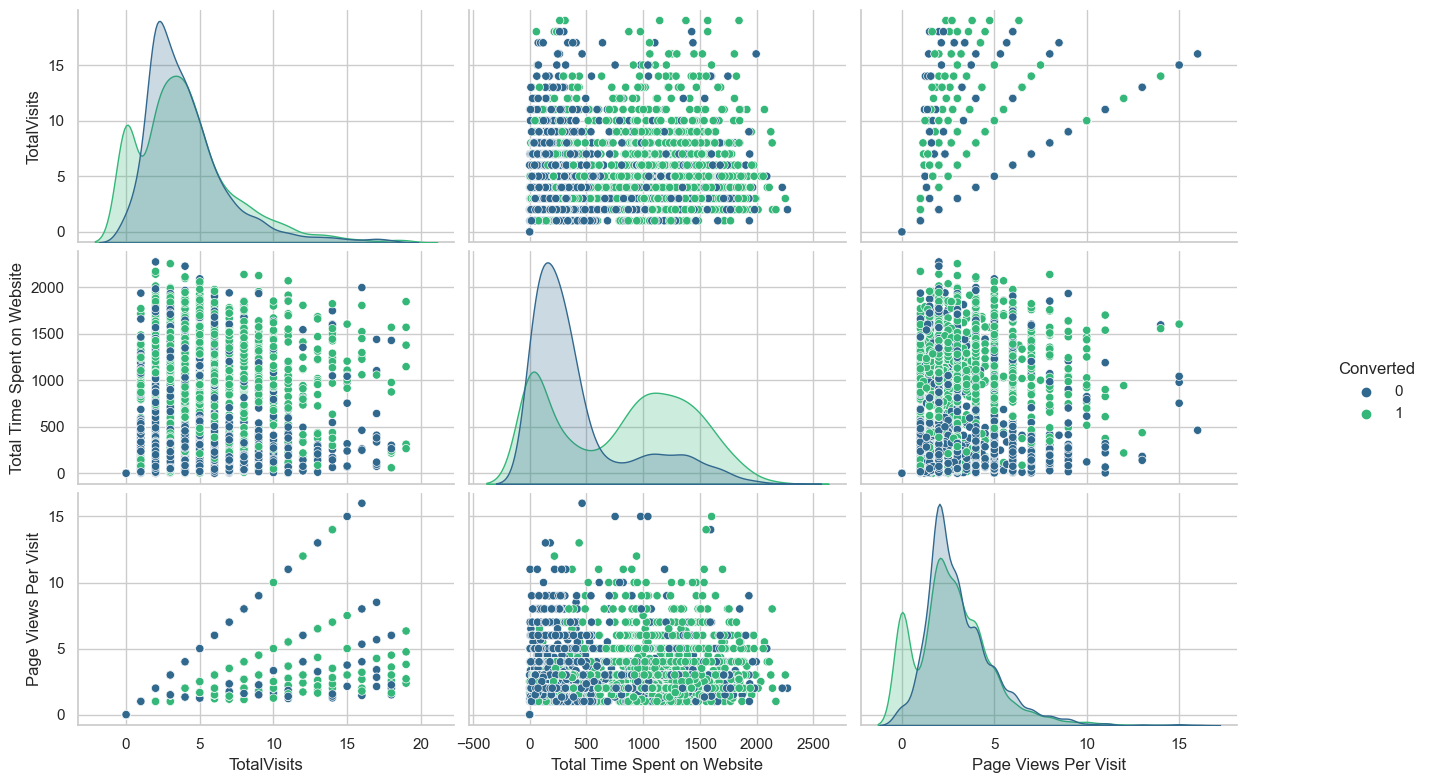

In [41]:
xedu = data_leads_new[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']]
palette = sns.color_palette("viridis", n_colors=2)
sns.set(style="whitegrid")
pairplot = sns.pairplot(xedu, diag_kind='kde', hue='Converted', palette=palette)
pairplot.fig.set_size_inches(15, 8)
plt.show()

In [42]:
pt = PowerTransformer()
txedu = pd.DataFrame(pt.fit_transform(xedu))
txedu.columns = xedu.columns
txedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-0.581877,1.262085,-0.345925,0.978852
1,-1.125539,-0.185837,-1.016489,-1.021605
2,-0.581877,1.343409,-0.345925,0.978852
3,1.264365,1.117067,2.112778,0.978852
4,1.264365,1.110376,0.029423,0.978852


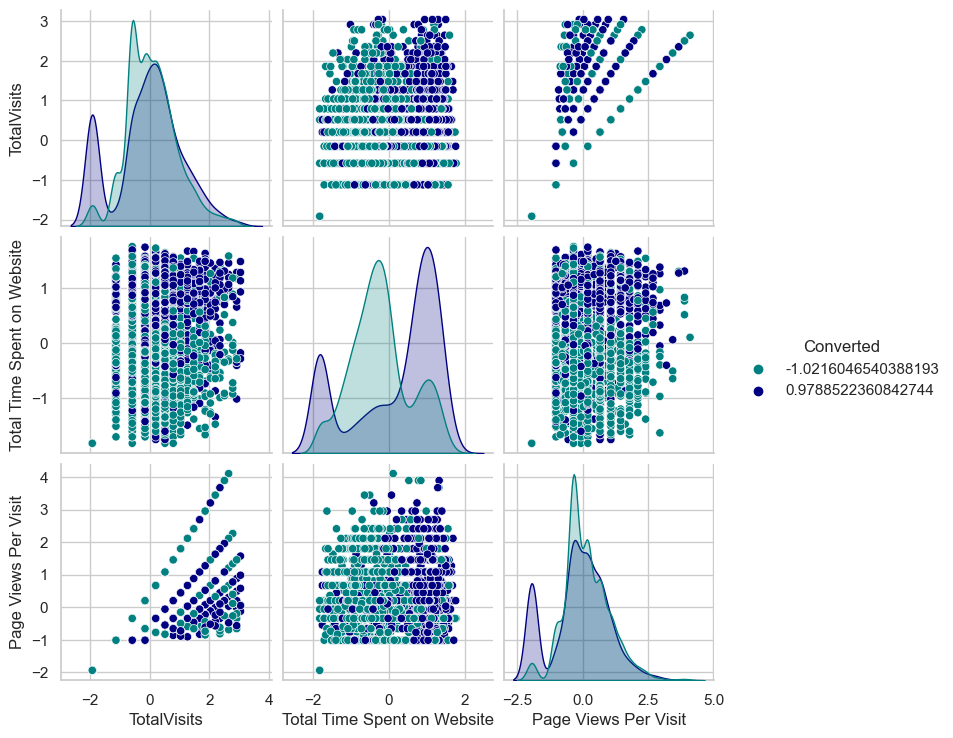

In [43]:
cpalette = ['#008080', '#000080']
sns.pairplot(txedu, diag_kind='kde', hue='Converted', palette=cpalette)
plt.show()

# Modeling

### Dummy variable creation

In [44]:
#getting a list of categorical columns

cols_01= data_leads_new.select_dtypes(include=['object']).columns
cols_01

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(data_leads_new[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Leads_dumy = pd.concat([data_leads_new, dummy], axis=1)
Leads_dumy

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,F

In [46]:
Leads_dumy = Leads_dumy.drop(['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Specialization','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity'],axis= 1)
Leads_dumy

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2.0,1532,2.00,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,1,2.0,1640,2.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10,1,8.0,1351,8.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,T

In [47]:
Leads_dumy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,2.0,1532,2.00,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,1,2.0,1640,2.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10,1,8.0,1351,8.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,T

In [48]:
Leads_dumy = Leads_dumy.astype(float)
Leads_dumy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1.0,2.0,1532.0,2.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,305.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,2.0,1640.0,2.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,8.0,1351.0,8.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.0,8.0,1343.0,2.67,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
Leads_dumy = Leads_dumy.reset_index(drop=True)
Leads_dumy.index = Leads_dumy.index + 0
Leads_dumy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1.0,2.0,1532.0,2.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,305.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,1640.0,2.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,8.0,1351.0,8.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,8.0,1343.0,2.67,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
X = Leads_dumy.drop(columns=['Converted'])
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,2.0,1532.0,2.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,305.0,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1640.0,2.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.0,1351.0,8.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,1343.0,2.67,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
Y = Leads_dumy['Converted']
Y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Converted, dtype: float64

In [52]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=10)

In [53]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1418,0.210526,0.741234,0.266667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2945,0.157895,0.073680,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275,0.315789,0.720373,0.400000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1166,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3221,0.105263,0.638260,0.133333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


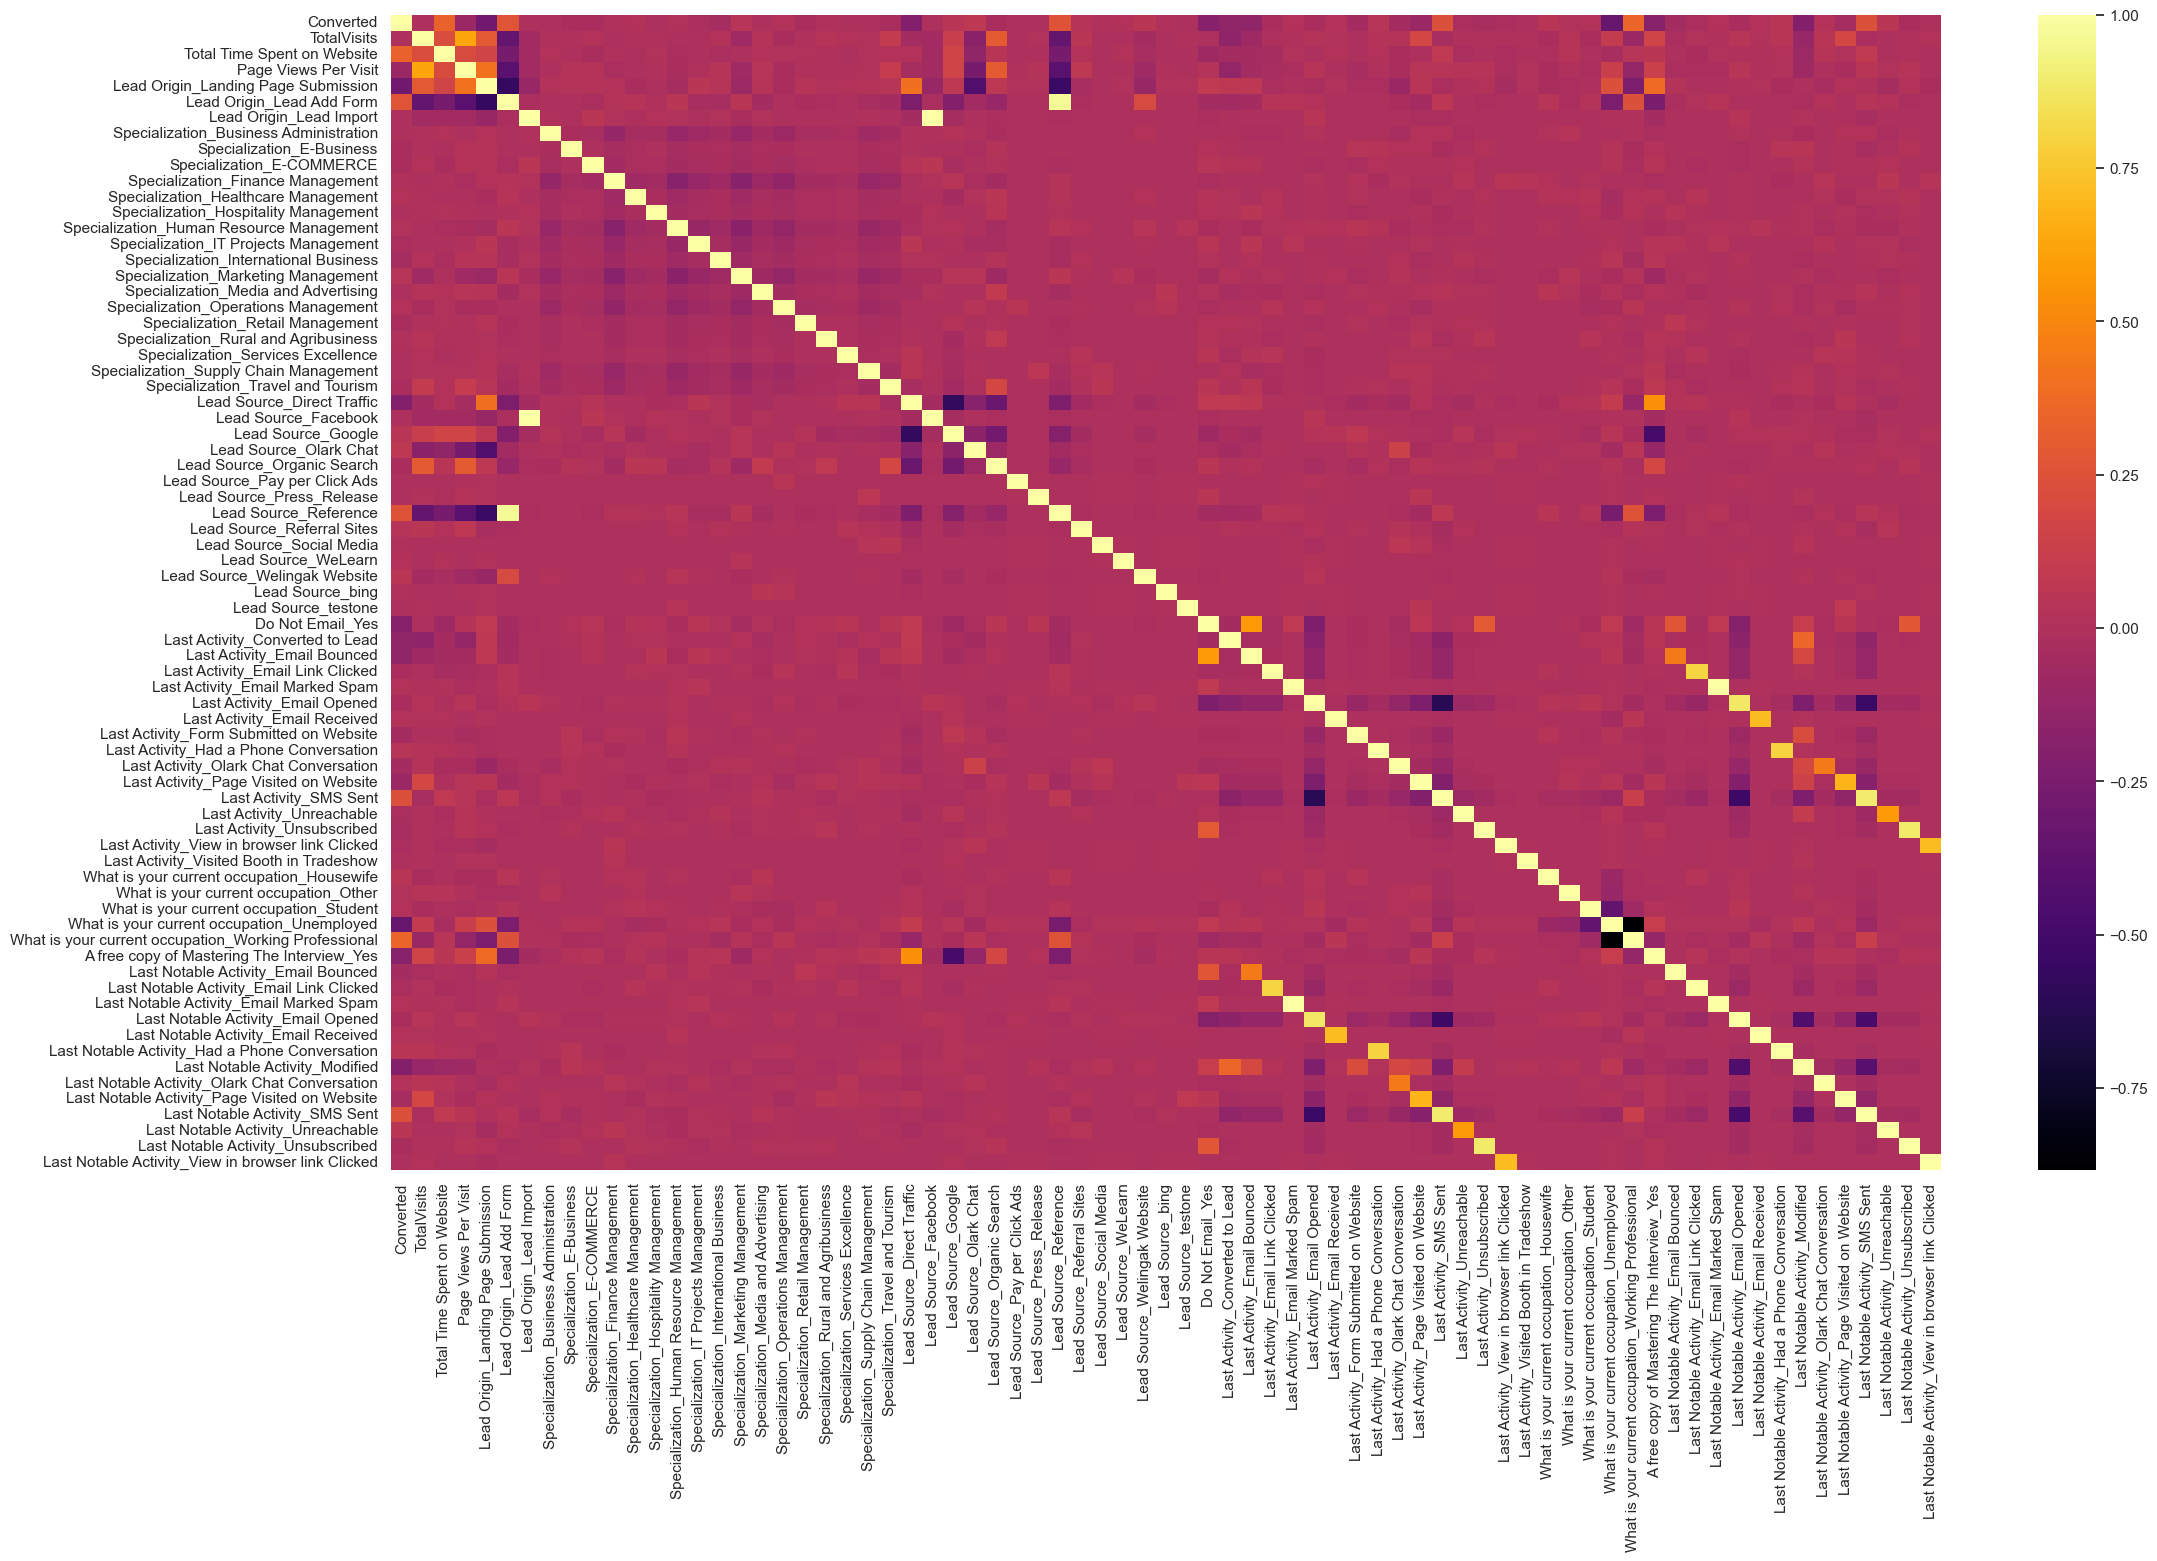

In [54]:
# Looking at the correlation table
plt.figure(figsize=(25, 15))
sns.heatmap(Leads_dumy.corr(), cmap='inferno')
plt.show()

In [55]:
logr = LogisticRegression()

In [56]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=logr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [57]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('Specialization_Business Administration', False, 21),
 ('Specialization_E-Business', False, 5),
 ('Specialization_E-COMMERCE', False, 34),
 ('Specialization_Finance Management', False, 39),
 ('Specialization_Healthcare Management', False, 20),
 ('Specialization_Hospitality Management', False, 4),
 ('Specialization_Human Resource Management', False, 22),
 ('Specialization_IT Projects Management', False, 38),
 ('Specialization_International Business', False, 36),
 ('Specialization_Marketing Management', False, 40),
 ('Specialization_Media and Advertising', False, 24),
 ('Specialization_Operations Management', False, 23),
 ('Specialization_Retail Management', False, 29),
 ('Specialization_Rural and Agribusiness', False, 28),
 ('Specialization_Services 

In [58]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [59]:
##All the variables selected by RFE, next statistics part (p-values and the VIFs)

# Selecting columns selected by RFE
X_train = X_train[col]

In [60]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3123
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1382.6
Date:                Sat, 24 Aug 2024   Deviance:                       2765.1
Time:                        21:46:18   Pearson chi2:                 3.47e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3969
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1062      0.287      0.370      0.712      -0.457       0.670
TotalVisits                                              1.6364      0.391      4.183      0.000       0.870       2.403
Total Time Spent on Website                              4.1926      0.208     20.142      0.000       3.785       4.601
Page Views Per Visit                                    -2.0814      0.489     -4.258      0.000      -3.039      -1.123
Lead Origin_Landing Page Submission                     -1.0952      0.156     -7.004      0.000      -1.402      -0.789
Lead Origin_Lead Add Form                                1.3541      1.235      1.097      0.273      -1.065       3.774
Lead Source_Direct Traffic                              -0.3582      0.110     -3.248      0.001      -0.574      -0.142
Lead Source_Organic Search                              -0.1881      0.154     -1.222      0.222      -0.490       0.114
Lead Source_Reference                                    1.8259      1.287      1.419      0.156      -0.697       4.348
Lead Source_Welingak Website                            23.2368   3.33e+04      0.001      0.999   -6.53e+04    6.53e+04
Do Not Email_Yes                                        -1.9130      0.258     -7.403      0.000      -2.419      -1.407
Last Activity_Converted to Lead                         -1.1234      0.266     -4.225      0.000      -1.645      -0.602
Last Activity_Had a Phone Conversation                   0.9066      1.422      0.637      0.524      -1.881       3.694
Last Activity_Olark Chat Conversation                   -1.1066      0.322     -3.441      0.001      -1.737      -0.476
Last Activity_SMS Sent                                   1.0961      0.103     10.678      0.000       0.895       1.297
What is your current occupation_Housewife               24.0861   4.33e+04      0.001      1.000   -8.48e+04    8.48e+04
What is your current occupation_Unemployed              -0.7672      0.256     -2.997      0.003      -1.269      -0.265
What is your current occupation_Working Professional     1.8166      0.322      5.637      0.000       1.185       2.448
Last Notable Activity_Had a Phone Conversation          24.0061   3.42e+04      0.001      0.999   -6.71e+04    6.71e+04
Last Notable Activity_Unreachable                       24.3688   2.83e+04      0.001      0.999   -5.54e+04    5.54e+04
Last Notable Activity_Unsubscribed                       1.4335      0.676      2.122      0.034       0.109       2.757
========================================================================================================================
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,83.06
7,Lead Source_Reference,78.21
3,Lead Origin_Landing Page Submission,8.00
15,What is your current occupation_Unemployed,7.58
2,Page Views Per Visit,6.08
8,Lead Source_Welingak Website,5.34
0,TotalVisits,4.91
11,Last Activity_Had a Phone Conversation,3.02
17,Last Notable Activity_Had a Phone Conversation,3.02
1,Total Time Spent on Website,2.48


### The VIF values seem fine but some p-values are 99 %. So removing ' What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'.

In [62]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [63]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3125
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1387.6
Date:                Sat, 24 Aug 2024   Deviance:                       2775.2
Time:                        21:46:18   Pearson chi2:                 3.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3950
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2461      0.281      0.877      0.381      -0.304       0.796
TotalVisits                                              1.6302      0.390      4.181      0.000       0.866       2.395
Total Time Spent on Website                              4.1849      0.208     20.128      0.000       3.777       4.592
Page Views Per Visit                                    -2.1062      0.488     -4.317      0.000      -3.062      -1.150
Lead Origin_Landing Page Submission                     -1.0805      0.156     -6.925      0.000      -1.386      -0.775
Lead Origin_Lead Add Form                                1.3500      1.235      1.094      0.274      -1.070       3.770
Lead Source_Direct Traffic                              -0.3723      0.110     -3.385      0.001      -0.588      -0.157
Lead Source_Organic Search                              -0.1853      0.154     -1.206      0.228      -0.486       0.116
Lead Source_Reference                                    1.8255      1.287      1.418      0.156      -0.697       4.348
Lead Source_Welingak Website                            22.2378   2.02e+04      0.001      0.999   -3.96e+04    3.96e+04
Do Not Email_Yes                                        -1.9143      0.258     -7.415      0.000      -2.420      -1.408
Last Activity_Converted to Lead                         -1.1341      0.266     -4.269      0.000      -1.655      -0.613
Last Activity_Had a Phone Conversation                   3.0998      1.095      2.831      0.005       0.954       5.246
Last Activity_Olark Chat Conversation                   -1.1201      0.322     -3.480      0.001      -1.751      -0.489
Last Activity_SMS Sent                                   1.0920      0.103     10.640      0.000       0.891       1.293
What is your current occupation_Unemployed              -0.9030      0.249     -3.626      0.000      -1.391      -0.415
What is your current occupation_Working Professional     1.6777      0.317      5.297      0.000       1.057       2.298
Last Notable Activity_Unreachable                       23.3672   1.72e+04      0.001      0.999   -3.36e+04    3.36e+04
Last Notable Activity_Unsubscribed                       1.4339      0.675      2.123      0.034       0.110       2.758
========================================================================================================================
"""

### Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

In [64]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [65]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3126
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1388.4
Date:                Sat, 24 Aug 2024   Deviance:                       2776.8
Time:                        21:46:18   Pearson chi2:                 3.43e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2482      0.281      0.885      0.376      -0.302       0.798
TotalVisits                                              1.6312      0.390      4.183      0.000       0.867       2.396
Total Time Spent on Website                              4.1855      0.208     20.130      0.000       3.778       4.593
Page Views Per Visit                                    -2.1067      0.488     -4.318      0.000      -3.063      -1.150
Lead Origin_Landing Page Submission                     -1.0805      0.156     -6.925      0.000      -1.386      -0.775
Lead Origin_Lead Add Form                                3.0646      0.398      7.692      0.000       2.284       3.846
Lead Source_Direct Traffic                              -0.3725      0.110     -3.386      0.001      -0.588      -0.157
Lead Source_Organic Search                              -0.1856      0.154     -1.208      0.227      -0.487       0.116
Lead Source_Welingak Website                            20.5243   2.02e+04      0.001      0.999   -3.96e+04    3.96e+04
Do Not Email_Yes                                        -1.9105      0.258     -7.413      0.000      -2.416      -1.405
Last Activity_Converted to Lead                         -1.1334      0.266     -4.266      0.000      -1.654      -0.613
Last Activity_Had a Phone Conversation                   3.1013      1.095      2.833      0.005       0.955       5.247
Last Activity_Olark Chat Conversation                   -1.1194      0.322     -3.478      0.001      -1.750      -0.489
Last Activity_SMS Sent                                   1.0937      0.103     10.661      0.000       0.893       1.295
What is your current occupation_Unemployed              -0.9064      0.249     -3.644      0.000      -1.394      -0.419
What is your current occupation_Working Professional     1.6765      0.316      5.298      0.000       1.056       2.297
Last Notable Activity_Unreachable                       23.3697   1.72e+04      0.001      0.999   -3.36e+04    3.37e+04
Last Notable Activity_Unsubscribed                       1.4309      0.675      2.119      0.034       0.108       2.754
========================================================================================================================
"""

In [66]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,7.92
13,What is your current occupation_Unemployed,7.48
2,Page Views Per Visit,6.08
0,TotalVisits,4.89
1,Total Time Spent on Website,2.47
5,Lead Source_Direct Traffic,2.31
14,What is your current occupation_Working Profes...,2.18
12,Last Activity_SMS Sent,1.69
4,Lead Origin_Lead Add Form,1.64
6,Lead Source_Organic Search,1.47


In [67]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [68]:

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3127
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1397.9
Date:                Sat, 24 Aug 2024   Deviance:                       2795.8
Time:                        21:46:19   Pearson chi2:                 3.44e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1175      0.279      0.422      0.673      -0.429       0.664
TotalVisits                                              0.7746      0.331      2.343      0.019       0.127       1.422
Total Time Spent on Website                              4.1537      0.207     20.087      0.000       3.748       4.559
Lead Origin_Landing Page Submission                     -1.2212      0.153     -7.980      0.000      -1.521      -0.921
Lead Origin_Lead Add Form                                3.1826      0.397      8.011      0.000       2.404       3.961
Lead Source_Direct Traffic                              -0.3271      0.109     -2.998      0.003      -0.541      -0.113
Lead Source_Organic Search                              -0.2536      0.152     -1.672      0.095      -0.551       0.044
Lead Source_Welingak Website                            20.5189   2.02e+04      0.001      0.999   -3.95e+04    3.96e+04
Do Not Email_Yes                                        -1.8875      0.258     -7.320      0.000      -2.393      -1.382
Last Activity_Converted to Lead                         -1.0750      0.265     -4.049      0.000      -1.595      -0.555
Last Activity_Had a Phone Conversation                   3.0545      1.080      2.827      0.005       0.937       5.172
Last Activity_Olark Chat Conversation                   -1.0540      0.318     -3.309      0.001      -1.678      -0.430
Last Activity_SMS Sent                                   1.0491      0.101     10.344      0.000       0.850       1.248
What is your current occupation_Unemployed              -0.8900      0.249     -3.581      0.000      -1.377      -0.403
What is your current occupation_Working Professional     1.6869      0.316      5.332      0.000       1.067       2.307
Last Notable Activity_Unreachable                       23.3337    1.7e+04      0.001      0.999   -3.33e+04    3.34e+04
Last Notable Activity_Unsubscribed                       1.3676      0.674      2.030      0.042       0.047       2.688
========================================================================================================================
"""

In [69]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3127
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1397.9
Date:                Sat, 24 Aug 2024   Deviance:                       2795.8
Time:                        21:46:19   Pearson chi2:                 3.44e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3910
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1175      0.279      0.422      0.673      -0.429       0.664
TotalVisits                                              0.7746      0.331      2.343      0.019       0.127       1.422
Total Time Spent on Website                              4.1537      0.207     20.087      0.000       3.748       4.559
Lead Origin_Landing Page Submission                     -1.2212      0.153     -7.980      0.000      -1.521      -0.921
Lead Origin_Lead Add Form                                3.1826      0.397      8.011      0.000       2.404       3.961
Lead Source_Direct Traffic                              -0.3271      0.109     -2.998      0.003      -0.541      -0.113
Lead Source_Organic Search                              -0.2536      0.152     -1.672      0.095      -0.551       0.044
Lead Source_Welingak Website                            20.5189   2.02e+04      0.001      0.999   -3.95e+04    3.96e+04
Do Not Email_Yes                                        -1.8875      0.258     -7.320      0.000      -2.393      -1.382
Last Activity_Converted to Lead                         -1.0750      0.265     -4.049      0.000      -1.595      -0.555
Last Activity_Had a Phone Conversation                   3.0545      1.080      2.827      0.005       0.937       5.172
Last Activity_Olark Chat Conversation                   -1.0540      0.318     -3.309      0.001      -1.678      -0.430
Last Activity_SMS Sent                                   1.0491      0.101     10.344      0.000       0.850       1.248
What is your current occupation_Unemployed              -0.8900      0.249     -3.581      0.000      -1.377      -0.403
What is your current occupation_Working Professional     1.6869      0.316      5.332      0.000       1.067       2.307
Last Notable Activity_Unreachable                       23.3337    1.7e+04      0.001      0.999   -3.33e+04    3.34e+04
Last Notable Activity_Unsubscribed                       1.3676      0.674      2.030      0.042       0.047       2.688
========================================================================================================================
"""

In [70]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.36
12,What is your current occupation_Unemployed,7.31
0,TotalVisits,3.57
1,Total Time Spent on Website,2.47
4,Lead Source_Direct Traffic,2.29
13,What is your current occupation_Working Profes...,2.15
11,Last Activity_SMS Sent,1.67
3,Lead Origin_Lead Add Form,1.63
5,Lead Source_Organic Search,1.45
7,Do Not Email_Yes,1.20


In [71]:
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)

In [72]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3128
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1431.6
Date:                Sat, 24 Aug 2024   Deviance:                       2863.2
Time:                        21:46:19   Pearson chi2:                 3.45e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3778
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5963      0.264     -2.258      0.024      -1.114      -0.079
TotalVisits                                              0.3474      0.323      1.077      0.281      -0.285       0.979
Total Time Spent on Website                              3.9641      0.201     19.740      0.000       3.570       4.358
Lead Origin_Lead Add Form                                3.9375      0.386     10.189      0.000       3.180       4.695
Lead Source_Direct Traffic                              -0.6278      0.102     -6.175      0.000      -0.827      -0.429
Lead Source_Organic Search                              -0.3771      0.147     -2.563      0.010      -0.665      -0.089
Lead Source_Welingak Website                            20.5548   2.04e+04      0.001      0.999   -3.99e+04    3.99e+04
Do Not Email_Yes                                        -1.8631      0.253     -7.359      0.000      -2.359      -1.367
Last Activity_Converted to Lead                         -1.0971      0.263     -4.169      0.000      -1.613      -0.581
Last Activity_Had a Phone Conversation                   3.1344      1.079      2.905      0.004       1.020       5.249
Last Activity_Olark Chat Conversation                   -0.6639      0.307     -2.164      0.030      -1.265      -0.063
Last Activity_SMS Sent                                   1.0263      0.100     10.258      0.000       0.830       1.222
What is your current occupation_Unemployed              -0.9376      0.248     -3.784      0.000      -1.423      -0.452
What is your current occupation_Working Professional     1.7666      0.316      5.589      0.000       1.147       2.386
Last Notable Activity_Unreachable                       23.4813   1.71e+04      0.001      0.999   -3.35e+04    3.36e+04
Last Notable Activity_Unsubscribed                       1.4435      0.668      2.161      0.031       0.134       2.753
========================================================================================================================
"""

In [73]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3144
Model:                            GLM   Df Residuals:                     3128
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1431.6
Date:                Sat, 24 Aug 2024   Deviance:                       2863.2
Time:                        21:46:19   Pearson chi2:                 3.45e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3778
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5963      0.264     -2.258      0.024      -1.114      -0.079
TotalVisits                                              0.3474      0.323      1.077      0.281      -0.285       0.979
Total Time Spent on Website                              3.9641      0.201     19.740      0.000       3.570       4.358
Lead Origin_Lead Add Form                                3.9375      0.386     10.189      0.000       3.180       4.695
Lead Source_Direct Traffic                              -0.6278      0.102     -6.175      0.000      -0.827      -0.429
Lead Source_Organic Search                              -0.3771      0.147     -2.563      0.010      -0.665      -0.089
Lead Source_Welingak Website                            20.5548   2.04e+04      0.001      0.999   -3.99e+04    3.99e+04
Do Not Email_Yes                                        -1.8631      0.253     -7.359      0.000      -2.359      -1.367
Last Activity_Converted to Lead                         -1.0971      0.263     -4.169      0.000      -1.613      -0.581
Last Activity_Had a Phone Conversation                   3.1344      1.079      2.905      0.004       1.020       5.249
Last Activity_Olark Chat Conversation                   -0.6639      0.307     -2.164      0.030      -1.265      -0.063
Last Activity_SMS Sent                                   1.0263      0.100     10.258      0.000       0.830       1.222
What is your current occupation_Unemployed              -0.9376      0.248     -3.784      0.000      -1.423      -0.452
What is your current occupation_Working Professional     1.7666      0.316      5.589      0.000       1.147       2.386
Last Notable Activity_Unreachable                       23.4813   1.71e+04      0.001      0.999   -3.35e+04    3.36e+04
Last Notable Activity_Unsubscribed                       1.4435      0.668      2.161      0.031       0.134       2.753
========================================================================================================================
"""

In [74]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,5.00
0,TotalVisits,3.39
1,Total Time Spent on Website,2.45
3,Lead Source_Direct Traffic,1.93
12,What is your current occupation_Working Profes...,1.91
10,Last Activity_SMS Sent,1.67
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Organic Search,1.43
6,Do Not Email_Yes,1.20
7,Last Activity_Converted to Lead,1.14


#### All the VIF values are good and all the p-values are below 0.05. So we can fix model.

# Creating Prediction

In [75]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train_sm))
y_train_pred[:10]

1418    0.924409
2945    0.233796
275     0.914434
1166    0.997837
3221    0.188745
4252    0.963023
595     0.556302
3066    0.446530
2347    0.022452
2580    0.099945
dtype: float64

In [76]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.92440858, 0.23379592, 0.91443383, 0.99783706, 0.18874526,
       0.96302315, 0.5563016 , 0.44652987, 0.02245241, 0.09994495])

In [77]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1.0,0.924409
1,0.0,0.233796
2,0.0,0.914434
3,1.0,0.997837
4,0.0,0.188745


In [78]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,1.0,0.924409,1
1,0.0,0.233796,0
2,0.0,0.914434,1
3,1.0,0.997837,1
4,0.0,0.188745,0


In [79]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1227  294]
 [ 375 1248]]


In [80]:
# Predicted     not_churn    churn
# Actual
# not_churn        1227      294
# churn            375       1248  

In [81]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7872137404580153


That's around 79% accuracy with is a very good value

In [82]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [83]:
# Calculating the sensitivity
TP/(TP+FN)

0.7689463955637708

In [84]:
# Calculating the specificity
TN/(TN+FP)


0.8067061143984221

#### With the current cut off as 0.5 we have around 79% accuracy, sensitivity of around 76% and specificity of around 80%.

#### Determining the Optimal Cutoff The 0.5 threshold was initially chosen to roughly evaluate the model's performance. However, to achieve better results, it's important to optimize the threshold. Let's start by plotting an ROC curve to assess the AUC score.

In [85]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

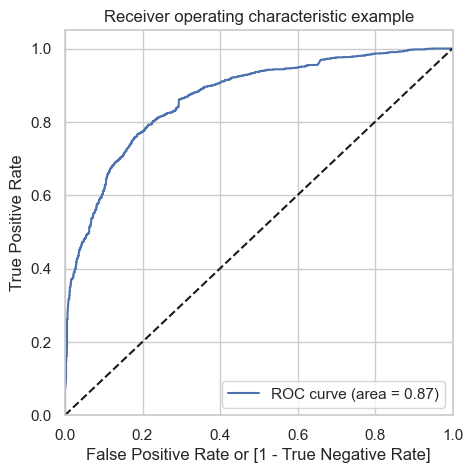

In [87]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [88]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.924409,1,1,1,1,1,1,1,1,1,1,1
1,0.0,0.233796,0,1,1,1,0,0,0,0,0,0,0
2,0.0,0.914434,1,1,1,1,1,1,1,1,1,1,1
3,1.0,0.997837,1,1,1,1,1,1,1,1,1,1,1
4,0.0,0.188745,0,1,1,0,0,0,0,0,0,0,0


In [89]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.516221,1.000000,0.000000
0.1,0.1,0.581107,0.990142,0.144642
0.2,0.2,0.684796,0.947628,0.404339
0.3,0.3,0.762087,0.900801,0.614070
0.4,0.4,0.777672,0.825632,0.726496
0.5,0.5,0.787214,0.768946,0.806706
0.6,0.6,0.776718,0.690696,0.868508
0.7,0.7,0.745229,0.592113,0.908613
0.8,0.8,0.707697,0.481824,0.948718
0.9,0.9,0.652990,0.339495,0.987508


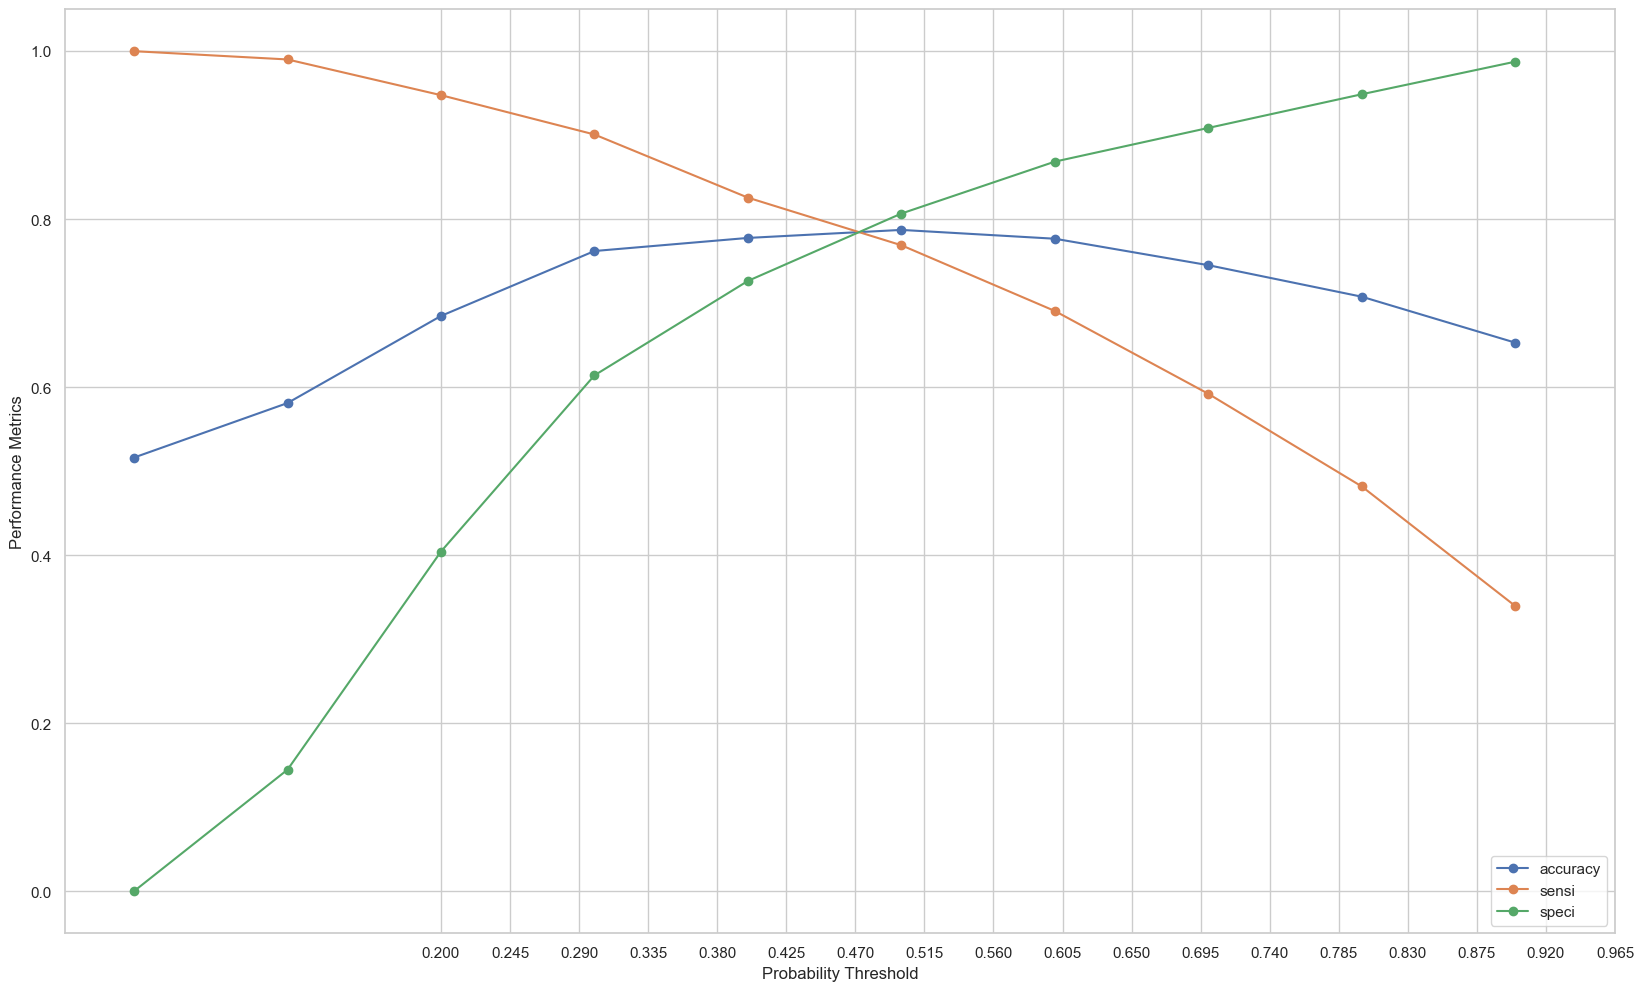

In [90]:
# Plot the lines with markers and increased figure size
plt.figure(figsize=(20, 12))
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], marker='o', ax=plt.gca())

# Add grid lines for better readability
plt.grid(True)

# Set x and y axis labels for clarity
plt.xlabel('Probability Threshold')
plt.ylabel('Performance Metrics')

# Customize x-axis ticks
plt.xticks(ticks=np.arange(0.2, 1.0, 0.045))  # This sets ticks at intervals of 0.05, starting from 0.1

# Show the plot with enhanced readability
plt.show()

#### As you can see that around 0.47, you get the optimal values of the three metrics. So let's choose 0.47 as our cutoff now.

In [91]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.47 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.924409,1,1,1,1,1,1,1,1,1,1,1,1
1,0.0,0.233796,0,1,1,1,0,0,0,0,0,0,0,0
2,0.0,0.914434,1,1,1,1,1,1,1,1,1,1,1,1
3,1.0,0.997837,1,1,1,1,1,1,1,1,1,1,1,1
4,0.0,0.188745,0,1,1,0,0,0,0,0,0,0,0,0


In [92]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7878498727735369

In [93]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1196,  325],
       [ 342, 1281]])

In [94]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [95]:
# Calculate Sensitivity

TP/(TP+FN)

0.789279112754159

In [96]:
# Calculate Specificity

TN/(TN+FP)

0.7863247863247863

#### With the current cut off as 0.43 we have accuracy, sensitivity and specificity of around 81%

## Prediction on Test set

In [97]:
 #Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [98]:
col = X_train.columns

In [99]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test = sm.add_constant(X_test[col])
X_test
X_test

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2270,1.0,0.210526,0.135375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3150,1.0,0.684211,0.096316,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
624,1.0,0.157895,0.596538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1899,1.0,0.105263,0.550377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2155,1.0,0.105263,0.709277,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,1.0,0.105263,0.017754,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3964,1.0,0.105263,0.501553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2312,1.0,0.157895,0.504217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1252,1.0,0.157895,0.110075,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [100]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.284113
1,0.0,0.215591
2,0.0,0.707993
3,1.0,0.664718
4,1.0,0.988073


In [101]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.47 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0.0,0.284113,0
1,0.0,0.215591,0
2,0.0,0.707993,1
3,1.0,0.664718,1
4,1.0,0.988073,1
...,...,...,...
1343,0.0,0.263366,0
1344,1.0,0.928722,1
1345,1.0,0.472986,1
1346,1.0,0.158348,0


In [102]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.793026706231454

In [103]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[553, 124],
       [155, 516]])

In [104]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [105]:
# Calculating the sensitivity
TP/(TP+FN)


0.7690014903129657

In [106]:
# Calculating the specificity
TN/(TN+FP)

0.8168389955686853

#### With the current cut off as 0.47 we have accuracy, sensitivity and specificity of around 81%

In [107]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1.0
 1       0.0
 2       0.0
 3       1.0
 4       0.0
        ... 
 3139    1.0
 3140    1.0
 3141    0.0
 3142    0.0
 3143    1.0
 Name: Converted, Length: 3144, dtype: float64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 3139    1
 3140    1
 3141    0
 3142    1
 3143    0
 Name: Predicted, Length: 3144, dtype: int64)

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


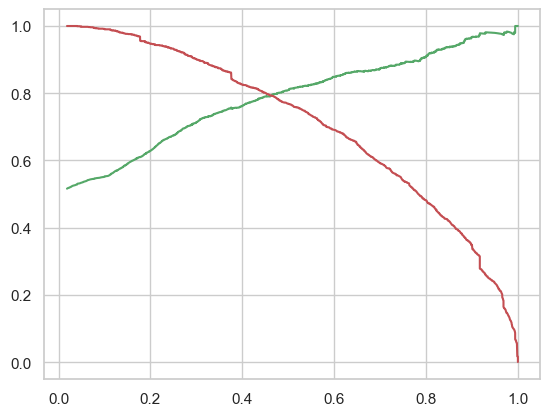

In [109]:

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.47 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.924409,1,1,1,1,1,1,1,1,1,1,1,1
1,0.0,0.233796,0,1,1,1,0,0,0,0,0,0,0,0
2,0.0,0.914434,1,1,1,1,1,1,1,1,1,1,1,1
3,1.0,0.997837,1,1,1,1,1,1,1,1,1,1,1,1
4,0.0,0.188745,0,1,1,0,0,0,0,0,0,0,0,0


In [111]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7878498727735369

In [112]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1196,  325],
       [ 342, 1281]])

In [113]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Calculate Precision

TP/(TP+FP)

0.7976338729763387

In [115]:
# Calculate Recall

TP/(TP+FN)

0.789279112754159

## Prediction on Test set

In [116]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.284113
1,0.0,0.215591
2,0.0,0.707993
3,1.0,0.664718
4,1.0,0.988073


In [117]:
# Making prediction using cut off 0.43
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.47 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0.0,0.284113,0
1,0.0,0.215591,0
2,0.0,0.707993,1
3,1.0,0.664718,1
4,1.0,0.988073,1
...,...,...,...
1343,0.0,0.263366,0
1344,1.0,0.928722,1
1345,1.0,0.472986,1
1346,1.0,0.158348,0


In [118]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.793026706231454

In [119]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[553, 124],
       [155, 516]])

In [120]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [121]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.80625

In [122]:
#Recall = TP / TP + FN
TP / (TP + FN)


0.7690014903129657

#### With the current cut off as 0.47 we have Precision around 80% , Recall around 76% and accuracy 80%.

#### The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

# Summary
Data Preparation: The dataset initially had 9,240 records with 37 columns, including identifiers like "Prospect ID" and "Lead Number." These were dropped since they were unique to each record and did not add value to the analysis.

Missing Data Handling: Columns with more than 3,400 missing values were dropped. This significantly reduced the dataset's dimensionality. Additional data cleaning steps included converting 'Select' values to NaN and subsequently handling or removing rows with missing values.

Outlier Detection: Boxplots were used to detect outliers in variables like "TotalVisits," "Total Time Spent on Website," and "Page Views Per Visit." Extreme outliers were removed to stabilize the data distribution.

Feature Engineering: Dummy variables were created for categorical columns such as "Lead Origin," "Lead Source," "Specialization," and others. This process expanded the dataset to include binary indicators for each category.

Model Building: The case study involved building a logistic regression model using selected features. Recursive Feature Elimination (RFE) was likely used to identify the most important predictors.

Model Evaluation: Metrics like VIF (Variance Inflation Factor) were used to check multicollinearity among predictors. The confusion matrix, precision, recall, and AUC scores were analyzed to evaluate model performance.


# Key Predictions:
### High Conversion Likelihood: Leads that spent more time on the website and visited more frequently were more likely to convert. Specific origins and specializations also played crucial roles in determining conversion likelihood.

### Optimized Threshold: The prediction model's threshold was optimized to balance sensitivity (the ability to correctly identify actual conversions) and specificity (the ability to correctly identify non-conversions). This optimization improved the overall accuracy and reliability of the predictions.

### Multicollinearity Management: By addressing multicollinearity through VIF analysis, the model ensured that the predictions were based on independent and reliable predictors, avoiding inflated standard errors that could mislead the outcomes.

## Conclusion:
The model effectively predicts lead conversion, providing valuable insights into the characteristics that most influence conversion rates. These predictions can guide marketing efforts, allowing targeted strategies that focus on high-potential leads, thereby increasing overall conversion rates and optimizing resource allocation.